In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(0)

## Q4 Baseline vs attribute LR vs full LR

In [2]:
df = pd.read_csv('http://www0.cs.ucl.ac.uk/staff/M.Herbster/boston-filter/Boston-filtered.csv') 
df.shape

(506, 13)

In [19]:
Y_col = 'MEDV'
X_cols = df.loc[:, df.columns != Y_col].columns
features = list(X_cols)
features

['CRIM',
 ' ZN ',
 'INDUS ',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT']

In [3]:
target = 'MEDV'
def get_train_test(df,split_proportion=2/3):
    """
     Splits data into train and test sets based on split_proportion. 
     Args:
     	 df: pandas dataframe to be split
     	 split_proportion: proportion of all samples to be used for training
     
     Returns: 
     	 trainX, trainY, testX, testY
    """
    shuffledidx = np.random.permutation(df.index)
    m = len(df.index)
    nsamples_train = int(split_proportion*m)
    train = df.iloc[shuffledidx[:nsamples_train]]
    test = df.iloc[shuffledidx[nsamples_train:]]
    
    trainY = train[target].to_numpy()
    trainX = train.loc[:, train.columns != target].to_numpy() #.columns
    testY = test[target].to_numpy()
    testX = test.loc[:, test.columns != target].to_numpy()

    return trainX, trainY, testX, testY

In [4]:
def compute_mse(y_true, y_pred):
    """
     Compute mean squared error ( MSE ) between two sets of labels
     Args:
     	 y_true: Ground truth ( correct ) target values.
     	 y_pred: Estimated target values.
     Returns: 
     	 Mean squared error
    """    
    assert y_true.shape == y_pred.shape
    return np.sum((y_true-y_pred)**2) / len(y_true)    

In [6]:
# Naive Regression

def NaiveRegressionCustom(xvals, yvals):
    """
     Naive regression as a baseline
     Args:
     	 xvals: array of independent vars
     	 yvals: array of target vars
     Returns: 
     	 regression weights
    """
    # feature matrix is a vector of ones
    xvals = np.ones((xvals.shape[0],1))
    # Linear Regression Fitting : W = (X.T X)^-1 X.T Y
    wts = np.linalg.pinv(xvals.T @ xvals) @ xvals.T @ yvals
    return wts

def predict_NaiveRegressionCustom(xvals,wts):
    """     
     Args:
     	 xvals: x values to predict on
     	 wts: regression weights
     Returns: 
     	 predicted target variable
    """
    xvals = np.ones((xvals.shape[0], 1)) # feature matrix is a vector of ones
    return wts @ xvals.T

In [10]:
trainX, trainY, testX, testY = get_train_test(df)
# Fitting
naive_wts = NaiveRegressionCustom(trainX, trainY)
# Prediction
train_pred = predict_NaiveRegressionCustom(trainX,naive_wts)
train_mse = compute_mse(trainY, train_pred)
test_pred = predict_NaiveRegressionCustom(testX,naive_wts)
test_mse = compute_mse(testY, test_pred)
print(naive_wts) # weights are the average of training examples
print(np.average(trainY))
print(f'Train MSE: {train_mse}, Test MSE: {test_mse}')

[22.25845697]
22.258456973293768
Train MSE:80.85144925111607, Test MSE: 91.76001423632094


In [30]:
# 20 runs
naive_train_MSE_list = []
naive_test_MSE_list = []
for i in range(20):
    trainX, trainY, testX, testY = get_train_test(df)
    # Fitting
    naive_wts = NaiveRegressionCustom(trainX, trainY)
    # Prediction
    train_pred = predict_NaiveRegressionCustom(trainX,naive_wts)
    train_mse = compute_mse(trainY, train_pred)
    naive_train_MSE_list.append(train_mse)
    test_pred = predict_NaiveRegressionCustom(testX,naive_wts)
    test_mse = compute_mse(testY, test_pred)
    naive_test_MSE_list.append(test_mse)

In [31]:
print(f'Naive regression train MSE mean : {np.mean(naive_train_MSE_list)}, SD: {np.std(naive_train_MSE_list)}')
print(f'Naive regression test MSE mean: {np.mean(naive_test_MSE_list)}, SD: {np.std(naive_test_MSE_list)}')

Naive regression train MSE mean : 84.11766709225228, SD: 5.5152352796306445
Naive regression test MSE mean: 85.2898626427924, SD: 10.858148273396655


4b) the constant function predicts a single, constant value for all observations corresponding to the average (or mean) of the target variable across all observations in each split of training set

### 4c. Linear Regression with single attributes


In [11]:
def LinearRegressionCustom(xvals, yvals):
    """
     implementation of LinearRegression to get fitting weights
     Args:
     	 xvals: array of independent vars
     	 yvals: array of target vars
     Returns: 
     	  regression weights   
    """
    # incorporating a bias term
    xvals = np.concatenate([np.ones((xvals.shape[0], 1)), xvals], axis=1)
    wts = np.linalg.pinv(xvals.T @ xvals) @ xvals.T @ yvals
    return wts
def predict_LinearRegressionCustom(xvals,wts):
    """
     Predict using custom linear regression.
     Args:
     	 xvals: x values to predict on
     	 wts: regression weights
     Returns: 
     	 predicted target variable
    """
    xvals = np.concatenate([np.ones((xvals.shape[0], 1)), xvals], axis=1) # incorporating a bias term
    return wts @ xvals.T

In [14]:
train_attribute_MSE_all = {}
test_attribute_MSE_all = {}
# Linear Regression with single attributes
trainX, trainY, testX, testY = get_train_test(df)
# Iterating over each attribute
for idx in range(trainX.shape[-1]):
    attribute_train = np.array(trainX[:,idx]).reshape(-1,1)
    # Fitting
    attribute_weights = LinearRegressionCustom(attribute_train,trainY)
    # Prediction
    train_pred = predict_LinearRegressionCustom(attribute_train, attribute_weights)
    train_mse = compute_mse(trainY, train_pred)
    train_attribute_MSE_all[idx] = train_mse
    attribute_test = np.array(testX[:,idx]).reshape(-1,1)
    test_pred = predict_LinearRegressionCustom(attribute_test,attribute_weights)
    test_mse = compute_mse(testY, test_pred)
    test_attribute_MSE_all[idx] = test_mse

print('Train MSE list', train_attribute_MSE_all)
print('Test MSE list',test_attribute_MSE_all)

Train MSE list {0: 69.64729125303994, 1: 71.10816230694698, 2: 61.81213104404266, 3: 80.85820807654265, 4: 64.33607732185811, 5: 38.63929130897324, 6: 68.22314611823643, 7: 75.9298501897251, 8: 68.95025592606095, 9: 63.51807183070817, 10: 64.02331921551655, 11: 38.76004981809042}
Test MSE list {0: 76.14221498496215, 1: 78.74896321121062, 2: 71.26348436103665, 3: 84.3684254027199, 4: 79.22115806111282, 5: 53.714996435865615, 6: 81.65933573327132, 7: 86.41429353181879, 8: 78.94387523246141, 9: 71.07814735897044, 10: 60.49822031127982, 11: 38.34869030829268}


In [33]:
train_attribute_MSE_all = {}
test_attribute_MSE_all = {}
for idx in range(trainX.shape[-1]):
    train_attribute_MSE_all[idx] = []
    test_attribute_MSE_all[idx] = []

#Averaging LR_attribute over 20 runs
for i in range(20):
    trainX, trainY, testX, testY = get_train_test(df)
    # Iterating over each attribute
    for idx in range(trainX.shape[-1]):
        attribute_train = np.array(trainX[:,idx]).reshape(-1,1)
        # Fitting
        attribute_weights = LinearRegressionCustom(attribute_train,trainY)
        # Prediction
        train_pred = predict_LinearRegressionCustom(attribute_train, attribute_weights)
        train_mse = compute_mse(trainY, train_pred)
        train_attribute_MSE_all[idx].append(train_mse)
        attribute_test = np.array(testX[:,idx]).reshape(-1,1)
        test_pred = predict_LinearRegressionCustom(attribute_test,attribute_weights)
        test_mse = compute_mse(testY, test_pred)
        test_attribute_MSE_all[idx].append(test_mse)

# print('Train MSE list', train_attribute_MSE_all)
# print('Test MSE list',test_attribute_MSE)

In [34]:
# 5d
mean_MSE_train_attribute = {}
mean_MSE_test_attribute = {}
sd_MSE_train_attribute = {}
sd_MSE_test_attribute = {}

for key, values in train_attribute_MSE_all.items():
    mean_MSE_train_attribute[key] = np.mean(values) 
    sd_MSE_train_attribute[key] = np.std(values)
for key, values in test_attribute_MSE_all.items():
    mean_MSE_test_attribute[key] = np.mean(values)
    sd_MSE_test_attribute[key] = np.std(values) 
print('MSE Train attributes mean: ',mean_MSE_train_attribute)
print('MSE Train attributes sd: ',sd_MSE_train_attribute)
print('MSE Test attributes mean: ',mean_MSE_test_attribute)
print('MSE Test attributes sd: ',sd_MSE_test_attribute)

MSE Train attributes mean:  {0: 70.26090906829704, 1: 72.31070306085113, 2: 64.02609127416903, 3: 81.67081960794172, 4: 68.30497035493883, 5: 43.88462150179403, 6: 71.64602224313069, 7: 78.54903652501866, 8: 71.08905370463242, 9: 65.01840012093386, 10: 61.51873615519669, 11: 37.74620075614458}
MSE Train attributes sd:  {0: 4.278819239766112, 1: 5.422247381609391, 2: 5.381477811530468, 3: 4.549784344920677, 4: 5.351383124916789, 5: 3.698192573821819, 6: 5.213095758706833, 7: 5.600702344983223, 8: 5.328209419615138, 9: 5.1250134157394776, 10: 4.038658558064396, 11: 2.6062808861447744}
MSE Test attributes mean:  {0: 76.72145655869566, 1: 76.42389112299614, 2: 66.45737529404474, 3: 82.97951322030502, 4: 70.8534141925231, 5: 43.497518645679165, 6: 74.44725612022852, 7: 80.98063110962056, 8: 74.75020433022763, 9: 68.18308340162815, 10: 65.53295732819566, 11: 40.20386482826912}
MSE Test attributes sd:  {0: 8.35451544901033, 1: 11.035109447380817, 2: 10.964209406194767, 3: 9.415171341987275, 4

### 4d. Linear Regression using all attributes

In [21]:
# Single Run
trainX, trainY, testX, testY = get_train_test(df)
# Fitting
model_weights = LinearRegressionCustom(trainX,trainY)
# Prediction
train_pred = predict_LinearRegressionCustom(trainX, model_weights)
train_mse = compute_mse(trainY, train_pred)
test_pred = predict_LinearRegressionCustom(testX,model_weights)
test_mse = compute_mse(testY, test_pred)

print(f'Over all attributes: train_mse: {train_mse}, test_mse:{test_mse}')

Over all attributes: train_mse: 22.247105274926852, test_mse:23.341646765078483


In [35]:
#Averaging complete LR over 20 runs
train_MSE_list = []
test_MSE_list = []
for i in range(20):
    trainX, trainY, testX, testY = get_train_test(df)
    # Fitting
    model_weights = LinearRegressionCustom(trainX,trainY)
    # Prediction
    train_pred = predict_LinearRegressionCustom(trainX, model_weights)
    train_mse = compute_mse(trainY, train_pred)
    train_MSE_list.append(train_mse)
    test_pred = predict_LinearRegressionCustom(testX,model_weights)
    test_mse = compute_mse(testY, test_pred)
    test_MSE_list.append(test_mse)

print(f'Train MSE over all attributes - mean: {np.average(train_MSE_list)}, SD: {np.std(train_MSE_list)}')
print(f'Test MSE over all attributes - mean: {np.average(test_MSE_list)}, SD: {np.std(test_MSE_list)}')

Train MSE over all attributes - mean: 21.921379157379935, SD: 1.6187044236477768
Test MSE over all attributes - mean: 24.500814188283258, SD: 3.2214767827603064


## Q5 Kernelised ridge regression

In [36]:
def gaussian_kernel(xi, xj, sigma):
    """
     Gaussian kernel function of two points.
    """
    return np.exp(-(np.linalg.norm(xi - xj)**2 / (2 * (sigma**2))))

def compute_kernel_matrix(x1vals,x2vals, sigma):
    """
     Compute the kernel matrix between two sets of points.
    """
    K = np.zeros((x1vals.shape[0], x2vals.shape[0]))
    # Computes the Gaussian kernel of the first dimension of the kernel.
    for i in range(x1vals.shape[0]):
        for j in range(x2vals.shape[0]):
            K[i, j] = gaussian_kernel(x1vals[i], x2vals[j], sigma)
    return K

In [37]:
def KernelRidgeRegressionCustom(K, yvals, sigma, gamma):
    # K = compute_kernel_matrix(xvals,sigma)
    # l = xvals.shape[0]
    l = K.shape[0]
    # alpha* = (K+ gamma.l.I_l)^-1.y
    alpha = np.linalg.pinv(K + gamma * l * np.eye(l)) @ yvals
    return alpha

### 5a. kernel ridge regression on the training set 
using five-fold cross-validation to choose best γ and σ - report training and test error

In [38]:
# Split data into train and test
main_train_X, main_train_Y, testX, testY = get_train_test(df)
gamma_values = np.array([2**-i for i in range(40, 25, -1)])
sigma_values = np.array([2**i for i in range(7, 14)])

# Create folds for cross validation
n_folds = 5
fold_size = int(len(main_train_X)/n_folds)
fold_indices = [] 
indices = np.arange(len(main_train_X))
for i in range(n_folds):
    start_idx, end_idx = i * fold_size,  (i + 1) * fold_size
    validation_indices = indices[start_idx: end_idx]
    train_indices = np.concatenate([indices[:start_idx], indices[end_idx:]])
    fold_indices.append((train_indices, validation_indices))


In [39]:
# dictionary to store kernel matrices for each training fold for each sigma - 5 folds * 7 sigmas
kernel_matrices = {}
for fold_num, (train_indices, validation_indices) in enumerate(fold_indices):
    x_train_fold = main_train_X[train_indices]
    # Precompute and store kernel matrix for each sigma for this fold
    for sigma in sigma_values:
        fold_sigma_key = (fold_num, sigma)
        kernel_matrices[fold_sigma_key] = compute_kernel_matrix(x_train_fold,x_train_fold, sigma) 
    print("Fold",fold_num)

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4


$$f(t) = \sum_{i=1}^m \alpha_i K_{\beta} (x_i, t)$$

In [40]:
def predict_KernelRidgeRegressionCustom(x_test,x_train,sigma, alpha):
    # implementing equation given above
    preds = np.zeros(x_test.shape[0])
    for i in range(x_test.shape[0]):
        prediction = 0
        for j in range(x_train.shape[0]):
            prediction += alpha[j] * gaussian_kernel(x_train[j], x_test[i], sigma)
        preds[i] = prediction
    return preds

    

In [41]:
chosen_gamma, chosen_sigma = None, None
best_score = float('inf')

cv_errors = np.zeros((len(gamma_values), len(sigma_values)))

# 525 total - 5 folds * 7 sigma * 15 gamma
for i, gamma in enumerate(gamma_values):
    for j, sigma in enumerate(sigma_values):
        fold_scores = []

        for fold_num, (train_indices, validation_indices) in enumerate(fold_indices):
            x_train, y_train = main_train_X[train_indices], main_train_Y[train_indices]
            x_validation, y_validation = main_train_X[validation_indices], main_train_Y[validation_indices]
            # Retrieve the precomputed kernel matrix for this fold and sigma
            K_train = kernel_matrices[(fold_num, sigma)]
            
            # Train the model on the training data
            alpha = KernelRidgeRegressionCustom(K_train, y_train, sigma, gamma)
            
            # Make predictions on the validation data
            y_pred = predict_KernelRidgeRegressionCustom(x_validation, x_train, sigma, alpha)
            score = compute_mse(y_validation, y_pred)
            fold_scores.append(score)
            # print(y_validation, y_pred)

        average_score = np.mean(fold_scores)
        print(f'gamma: {gamma}, sigma: {sigma}, scores: {average_score}')
        cv_errors[i, j] = average_score

        if average_score < best_score:
            best_score = average_score
            chosen_gamma, chosen_sigma = gamma, sigma
print('Best gamma and sigma :',chosen_gamma,chosen_sigma,best_score)

gamma: 9.094947017729282e-13, sigma: 128, scores: 1550.7754405989729
gamma: 9.094947017729282e-13, sigma: 256, scores: 350.1663906128115
gamma: 9.094947017729282e-13, sigma: 512, scores: 61.4393749552346
gamma: 9.094947017729282e-13, sigma: 1024, scores: 16.479885179750966
gamma: 9.094947017729282e-13, sigma: 2048, scores: 14.978601179399737
gamma: 9.094947017729282e-13, sigma: 4096, scores: 14.121660941104844
gamma: 9.094947017729282e-13, sigma: 8192, scores: 15.924566939289061
gamma: 1.8189894035458565e-12, sigma: 128, scores: 867.7566093860487
gamma: 1.8189894035458565e-12, sigma: 256, scores: 254.64450195295439
gamma: 1.8189894035458565e-12, sigma: 512, scores: 36.857594808054905
gamma: 1.8189894035458565e-12, sigma: 1024, scores: 15.677637369672993
gamma: 1.8189894035458565e-12, sigma: 2048, scores: 14.78169311033462
gamma: 1.8189894035458565e-12, sigma: 4096, scores: 13.892947312979704
gamma: 1.8189894035458565e-12, sigma: 8192, scores: 17.83876841241208
gamma: 3.637978807091713e

In [42]:
np.log2(chosen_gamma), np.log2(chosen_sigma), best_score

(-28.0, 9.0, 13.21930289175288)

In [43]:
log2_gammas = np.log2(gamma_values)
log2_sigma = np.log2(sigma_values)

5 b) Plot the “cross-validation error” (mean over folds of validation error) as a function of γ and σ

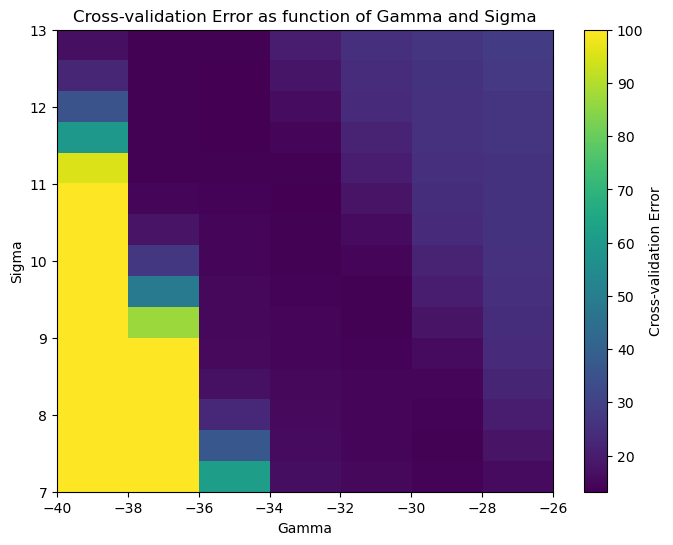

In [44]:
# TODO 3D plot?
Gamma, Sigma = np.meshgrid(log2_gammas, log2_sigma)
plt.figure(figsize=(8, 6))
plt.imshow(cv_errors, interpolation='nearest', cmap='viridis', 
           extent=[log2_gammas.min(), log2_gammas.max(), log2_sigma.min(), log2_sigma.max()],
           aspect='auto', origin='lower', vmin=cv_errors.min(), vmax=100)
plt.colorbar(label='Cross-validation Error')
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Gamma')
plt.ylabel('Sigma')
plt.title('Cross-validation Error as function of Gamma and Sigma')
plt.show()

5 c) Calculate the MSE on the training and test sets for the best γ and σ

In [45]:
# Retrain the model with best sigma and best gamma on the entire training set
# X, Y
# Train the model on the training data
K_train = compute_kernel_matrix(main_train_X, main_train_X, chosen_sigma) 
alpha = KernelRidgeRegressionCustom(K_train, main_train_Y, chosen_sigma, chosen_gamma)

# Evaluate on the training set
y_pred = predict_KernelRidgeRegressionCustom(main_train_X, main_train_X, chosen_sigma, alpha)
trainscore = compute_mse(main_train_Y, y_pred)
print('Training set score',trainscore)

# Evaluate on the test set # testX, testY
y_pred = predict_KernelRidgeRegressionCustom(testX, main_train_X, chosen_sigma, alpha)
testscore = compute_mse(testY, y_pred)
print('Test set score',testscore)

Training set score 8.184009734874135
Test set score 11.874773255198415


### 5d.

In [46]:
# Repetition of 4 a,c,d already done above 
# Below code is Repetition of 5 a and c 20 times

gamma_values = np.array([2**-i for i in range(40, 25, -1)])
sigma_values = np.array([2**i for i in range(7, 14)])
best_20_gammas = []
best_20_sigmas = []
train_errors_chosenparams = []
test_errors_chosenparams = []

for repeat in range(20): #TODO:20
    print(f'Run {repeat}/20: ')
    # Split data into train and test
    big_train_X, big_train_Y, testX, testY = get_train_test(df)

    # Create folds for cross validation
    n_folds = 5
    fold_size = int(len(big_train_X)/n_folds)
    fold_indices = [] 
    indices = np.arange(len(big_train_X))
    for i in range(n_folds):
        start_idx, end_idx = i * fold_size,  (i + 1) * fold_size
        validation_indices = indices[start_idx: end_idx]
        train_indices = np.concatenate([indices[:start_idx], indices[end_idx:]])
        fold_indices.append((train_indices, validation_indices))

    # dictionary to store kernel matrices for each training fold for each sigma - 5 folds * 7 sigmas
    print('-Computing kernel matrices ...')
    kernel_matrices = {}
    for fold_num, (train_indices, validation_indices) in enumerate(fold_indices):
        x_train_fold = big_train_X[train_indices]
        # Precompute and store kernel matrix for each sigma for this fold
        for sigma in sigma_values:
            fold_sigma_key = (fold_num, sigma)
            kernel_matrices[fold_sigma_key] = compute_kernel_matrix(x_train_fold,x_train_fold, sigma) 

    chosen_gamma, chosen_sigma = None, None
    best_score = float('inf')

    cv_errors = np.zeros((len(gamma_values), len(sigma_values)))

    # 525 total - 5 folds * 7 sigma * 15 gamma
    print('--Iterating over gammas and sigmas')
    for i, gamma in enumerate(gamma_values):
        for j, sigma in enumerate(sigma_values):
            fold_scores = []

            for fold_num, (train_indices, validation_indices) in enumerate(fold_indices):
                x_train, y_train = big_train_X[train_indices], big_train_Y[train_indices]
                x_validation, y_validation = big_train_X[validation_indices], big_train_Y[validation_indices]
                # Retrieve the precomputed kernel matrix for this fold and sigma
                K_train = kernel_matrices[(fold_num, sigma)]
                
                # Train the model on the training data
                alpha = KernelRidgeRegressionCustom(K_train, y_train, sigma, gamma)
                
                # Make predictions on the validation data
                y_pred = predict_KernelRidgeRegressionCustom(x_validation, x_train, sigma, alpha)
                score = compute_mse(y_validation, y_pred)
                fold_scores.append(score)
                # print(y_validation, y_pred)

            average_score = np.mean(fold_scores)
            # print(f'gamma: {gamma}, sigma: {sigma}, scores: {average_score}')
            cv_errors[i, j] = average_score

            if average_score < best_score:
                best_score = average_score
                chosen_gamma, chosen_sigma = gamma, sigma
    print('--- Best gamma and sigma for the run :',chosen_gamma,chosen_sigma,best_score)
    best_20_gammas.append(chosen_gamma)
    best_20_sigmas.append(chosen_sigma)

    # Retrain the model with best sigma and best gamma on the entire training set big_train_X, big_train_Y
    # Train the model on the training data
    K_train = compute_kernel_matrix(big_train_X,big_train_X, chosen_sigma) 
    alpha = KernelRidgeRegressionCustom(K_train, big_train_Y, chosen_sigma, chosen_gamma)
    # Evaluate on the training set
    y_pred = predict_KernelRidgeRegressionCustom(big_train_X, big_train_X, chosen_sigma, alpha)
    trainscore = compute_mse(big_train_Y, y_pred)
    print('---- Training set score',trainscore)
    train_errors_chosenparams.append(trainscore)
    # Evaluate on the test set
    # testX, testY
    y_pred = predict_KernelRidgeRegressionCustom(testX, big_train_X, chosen_sigma, alpha)
    testscore = compute_mse(testY, y_pred)
    print('---- Test set score',testscore)
    test_errors_chosenparams.append(testscore)

Run 0/20: 
-Computing kernel matrices ...
--Iterating over gammas and sigmas
--- Best gamma and sigma for the run : 4.656612873077393e-10 512 12.400608556782602
---- Training set score 6.7943199415164255
---- Test set score 12.677722999212326
Run 1/20: 
-Computing kernel matrices ...
--Iterating over gammas and sigmas
--- Best gamma and sigma for the run : 3.725290298461914e-09 512 12.699266265465678
---- Training set score 8.0937370239452
---- Test set score 11.968982977804892
Run 2/20: 
-Computing kernel matrices ...
--Iterating over gammas and sigmas
--- Best gamma and sigma for the run : 1.862645149230957e-09 512 10.87325709915405
---- Training set score 6.656517531554831
---- Test set score 13.581734690165302
Run 3/20: 
-Computing kernel matrices ...
--Iterating over gammas and sigmas
--- Best gamma and sigma for the run : 9.094947017729282e-13 1024 12.109042540634416
---- Training set score 5.313556783388848
---- Test set score 12.417498409989895
Run 4/20: 
-Computing kernel matr

In [47]:
# KRR MSE Train and Test - mean and sd
print(f'MSE of train data:  mean= {np.mean(train_errors_chosenparams)},  sd={np.std(train_errors_chosenparams)}')
print(f'MSE of test data:  mean= {np.mean(test_errors_chosenparams)},  sd={np.std(test_errors_chosenparams)}')

MSE of train data:  mean= 7.830663184089985,  sd=1.741928913924968
MSE of test data:  mean= 12.459172998505984,  sd=2.836043166725966


In [49]:
print(np.log2(best_20_gammas))
print(np.log2(best_20_sigmas))

[-31. -28. -29. -40. -28. -40. -26. -31. -32. -35. -32. -40. -28. -40.
 -29. -28. -39. -31. -28. -38.]
[ 9.  9.  9. 10.  9. 12.  8.  9.  8. 11.  9. 12.  9. 11.  9.  9. 12. 10.
  9. 12.]
